In [362]:
#  Author = Rohit Rawate
#  This is twitter Sentiment Analysis Project Where I have used twitter API to fetch the tweets
# Used In-Built Libraries to Analyse The Tweets 

### Importing Libraries

In [363]:
import pandas as pd
import numpy as np
import tweepy                                # Python library for accessing the Twitter API.
from textblob import TextBlob                # For Sentiment Classification
import re                                    # Python Package of Regular Expression to match similar patterns
import os
import matplotlib.pyplot as plt              # For data Visualisation

In [364]:

ls

DFtocsv.png
Image_To_Text Project.ipynb
LGM TASK imagetosketch.ipynb
ME.jpeg
ML_Start.ipynb
OCR_CarNumPlate.png
OCR_CarPlate.png
OCR_Input.png
OCR_clrNum.png
PSR_Twitter.ipynb
PSR_TwitterAnalysis.ipynb
PSR_tweetAnalysis.pdf
Psr_twitterCode.png
Rohit_LL.png
Sentiment_Analysispsr.png
Starting Pandas.ipynb
Username.csv
Welcome_Rohit.ipynb
YT_Downloader.ipynb
bareme.jpeg
dil chahta hai (DJ NYK Remix)  [Bollywood LoFi Chill Trap Beats].mp4
fotor.jpg
fotor1.jpg
me_Sketch.jpeg
pandas.png
py_Sketch.ipynb
test.csv


In [365]:
config = pd.read_csv("/Users/prawate/Desktop/JupyterNotebook/BE_Project/config.csv")

In [366]:
# config

In [367]:
twitterApiKey = config["twitterApikey"][0] 
twitterApiSecret = config["twitterApiSecret"][0] 
twitterApiAccesToken = config["twitterApiAccesToken"][0] 
twitterApiAccessTokenSecret = config["twitterApiAccessTokenSecret"][0] 

In [368]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccesToken, twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

##  Accessing the Twitter User  'Pramod Rawate'


In [369]:
Pramod ="PramodRawate"


In [370]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name= Pramod,
                       count = None).items(10);

In [371]:
# pd.options.display.max_rows


In [372]:
df = pd.DataFrame({'Tweets':[tweet.text for tweet in tweets]}) #,columns=['Tweets']

### All Tweets 

In [373]:
all_tweets = [tweet.text for tweet in tweets]

In [374]:
type(all_tweets)      #List
# all_tweets   

list

In [375]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [376]:
df

,Tweets
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...
2,Whatsapp goes down again.\n#whatsapp #whatsapp...
3,@shraddhamrkt How did you come to know that da...
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...
5,@IqooInd @IqooInd If possible can you bring ba...


In [377]:
df.head(10)

,Tweets
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...
2,Whatsapp goes down again.\n#whatsapp #whatsapp...
3,@shraddhamrkt How did you come to know that da...
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...
5,@IqooInd @IqooInd If possible can you bring ba...


In [378]:
# pd.options.display.max_rows

In [309]:
# df1 = df.rename(columns={0:"Tweets"}, inplace= True) 

## The Tweets column is of type Series ,So converting Series type to String 

In [384]:
String_data = df.to_string()

In [413]:
type(String_data)

str

In [385]:
String_data

"                                                                                                                                          Tweets\n0                                  RT @meeruansari: #BanIPL\\nSo sad to see kohli like that.\\n#IndiaVsNewZealand \\n#India https://t.co/GHGTjZ6BOt\n1  RT @MahuaMoitra: Stop lying Ajay Mishra! \\nHere is uncut video. Nobody hit your cars. There was no accident. The convoy just ploughed throug…\n2                                                                                         Whatsapp goes down again.\\n#whatsapp #whatsappGoesDown\n3                       @shraddhamrkt How did you come to know that date ks 29th July?\\nAllotment was supposed to be done on 26th July. 29th ???\n4                                                                 Me to Tatva Chitna IPO:\\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\\n𝒀𝒖𝒏 𝒏𝒂 𝒌𝒂𝒓 𝒔𝒊𝒕𝒂𝒎\\n\\n#TatvaChintanIPO\n5   @IqooInd @IqooInd If possible can you bring back the ICICI and 1K discount offer back. It's not possible but 

In [310]:
str_Tweets= df['Tweets'].astype(str)         #DataFrame.astype(dtype, copy=True, errors=’raise’)

In [335]:
str_Tweets

0    RT @meeruansari: #BanIPL\nSo sad to see kohli ...
1    RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...
2    Whatsapp goes down again.\n#whatsapp #whatsapp...
3    @shraddhamrkt How did you come to know that da...
4    Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...
5    @IqooInd @IqooInd If possible can you bring ba...
Name: Tweets, dtype: object

In [336]:
type(str_Tweets)

pandas.core.series.Series

## Droping the Tweetscleaned Column 

In [313]:
# df.drop(['Tweetscleaned'],axis=1) 
# df.drop(['Processed_Tweet'],axis=1) 
# del df["Processed_Tweet"]
# del df['str_Tweets']
# del df["Tweetscleaned"]

In [314]:
df

,Tweets
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...
2,Whatsapp goes down again.\n#whatsapp #whatsapp...
3,@shraddhamrkt How did you come to know that da...
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...
5,@IqooInd @IqooInd If possible can you bring ba...


In [315]:
df.dtypes

Tweets    object
dtype: object

In [323]:
str_Tweets[0]

'RT @meeruansari: #BanIPL\nSo sad to see kohli like that.\n#IndiaVsNewZealand \n#India https://t.co/GHGTjZ6BOt'

## Pre Processing 

In [317]:
def cleanUp(text):
#     fp = open(path, 'r+')
#     text = path.read()
#     text = re.sub('r,@[A-Za-z0-9_]',text,flags=0)
    return "".join(re.sub('r,@[A-Za-z0-9_ ]'," ",text).split())

In [338]:
def remove_url(txt):
    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [339]:
all_tweets_no_urls = [remove_url(tweet) for tweet in str_Tweets]


In [341]:
all_tweets_no_urls

['RT meeruansari BanIPLSo sad to see kohli like thatIndiaVsNewZealand India',
 'RT MahuaMoitra Stop lying Ajay Mishra Here is uncut video Nobody hit your cars There was no accident The convoy just ploughed throug',
 'Whatsapp goes down againwhatsapp whatsappGoesDown',
 'shraddhamrkt How did you come to know that date ks 29th JulyAllotment was supposed to be done on 26th July 29th',
 'Me to Tatva Chitna IPO TatvaChintanIPO',
 'IqooInd IqooInd If possible can you bring back the ICICI and 1K discount offer back Its not possible but just t']

In [395]:
# Tweetscleaned = [cleanUp(tweet) for tweet in str_Tweets]   # Just removes all the Spaces in the Text

In [397]:
# Tweetscleaned

In [391]:
# Tweetscleaned = cleanUp(String_data)
# str_no_Urls =  remove_url( String_data)

In [398]:
# Tweetscleaned
# str_no_Urls

## Analysis of Tweets 

In [399]:
def getTextSubjectivity(text):                        #Subjectivity[0,1]
    return TextBlob(text).sentiment.subjectivity

In [400]:
df['Subjectivity'] = df['Tweets'].apply(getTextSubjectivity)

In [401]:
df

,Tweets,Subjectivity
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...,1.000000
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...,0.800000
2,Whatsapp goes down again.\n#whatsapp #whatsapp...,0.288889
3,@shraddhamrkt How did you come to know that da...,0.000000
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...,0.000000
5,@IqooInd @IqooInd If possible can you bring ba...,0.500000


In [402]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity 

In [403]:
df['Polarity'] = df['Tweets'].apply(getTextPolarity)

In [404]:
df

,Tweets,Subjectivity,Polarity
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...,1.000000,-0.500000
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...,0.800000,-0.500000
2,Whatsapp goes down again.\n#whatsapp #whatsapp...,0.288889,-0.155556
3,@shraddhamrkt How did you come to know that da...,0.000000,0.000000
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...,0.000000,0.000000
5,@IqooInd @IqooInd If possible can you bring ba...,0.500000,0.000000


In [405]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
    

In [406]:
df["Score"]= df["Polarity"].apply(getTextAnalysis)

In [407]:
df

,Tweets,Subjectivity,Polarity,Score
0,RT @meeruansari: #BanIPL\nSo sad to see kohli ...,1.000000,-0.500000,Negative
1,RT @MahuaMoitra: Stop lying Ajay Mishra! \nHer...,0.800000,-0.500000,Negative
2,Whatsapp goes down again.\n#whatsapp #whatsapp...,0.288889,-0.155556,Negative
3,@shraddhamrkt How did you come to know that da...,0.000000,0.000000,Neutral
4,Me to Tatva Chitna IPO:\n𝑨𝒂 𝒃𝒉𝒊 𝒋𝒂 𝒔𝒂𝒏𝒂𝒎\n𝒀𝒖𝒏 ...,0.000000,0.000000,Neutral
5,@IqooInd @IqooInd If possible can you bring ba...,0.500000,0.000000,Neutral


In [408]:
Positive= df[df["Score"]=="Positive"]
print(str(Positive.shape[0]/(df.shape[0])*100)+"% of Positive Tweets")
posi=Positive.shape[0]/df.shape[0]*100

0.0% of Positive Tweets


In [409]:
Negative= df[df["Score"]=="Negative"]
print(str(Negative.shape[0]/(df.shape[0])*100)+"% of Negative Tweets")
neg=Negative.shape[0]/df.shape[0]*100

50.0% of Negative Tweets


In [410]:
Neutral= df[df["Score"]=="Neutral"]
print(str(Neutral.shape[0]/(df.shape[0])*100)+"% of Neutral Tweets")
neutral=Neutral.shape[0]/df.shape[0]*100

50.0% of Neutral Tweets


0.0 % Positive
 50.0 % Negative
 50.0 % Neutral


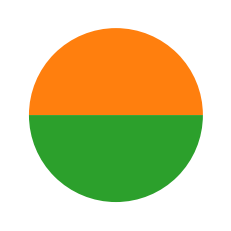

In [411]:
plt.pie([posi,neg,neutral])
print(posi,"% Positive\n",neg,"% Negative\n",neutral,"% Neutral")

In [412]:
explode =[0,0.1,0]
lables = 'Positive','Negative','Neutral'
sizes = [posi,neg,neutral]
colors = ["green","red","orange"]

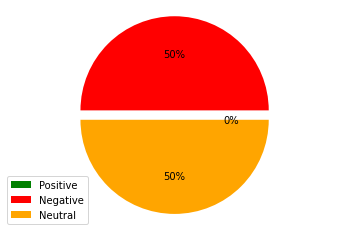

In [357]:
plt.pie(sizes,explode=explode,colors=colors,startangle=0,autopct="%1.1d%%")
plt.legend(lables,loc=(+0.0,-0))
plt.axis('equal')
plt.savefig("Sentiment_Analysispsr.png")

<BarContainer object of 2 artists>

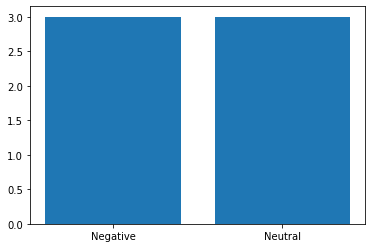

In [358]:
labels = df.groupby('Score').count().index.values     # Count of tweets in each category
values = df.groupby('Score').size().values           #sizes refer to categories like Neutral Negative,+ve
plt.bar(labels,values)

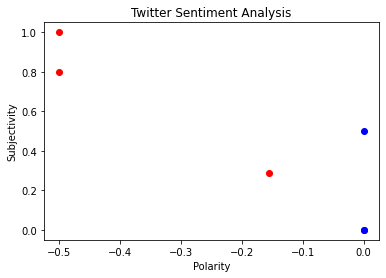

In [359]:
for index,row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')   
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()